In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
%matplotlib inline
pc.config.cloudy_exe = '/usr/local/Cloudy/c17.01/source/cloudy.exe'

In [2]:
def make_coronal(T):
    Min = pc.CloudyInput('../models/Coronal1_{}'.format(np.log10(T)))
    Min.set_cste_density(0)
    Min.set_stop(('zone = 1'))
    Min.set_other(('coronal {} K'.format(T), 
                   'set dr 0', 
                   'Cosmic Rays Background'))
    Min.print_input()

In [3]:
for T in np.logspace(2, 7, 6):
    make_coronal(T)

In [4]:
pc.run_cloudy(dir_='../models', n_proc=8, use_make=True)

In [5]:
Ms = pc.load_models('../models/Coronal1_', read_emis=False, read_heatcool=True)

In [6]:
len(Ms)

6

(1e-32, 1e-19)

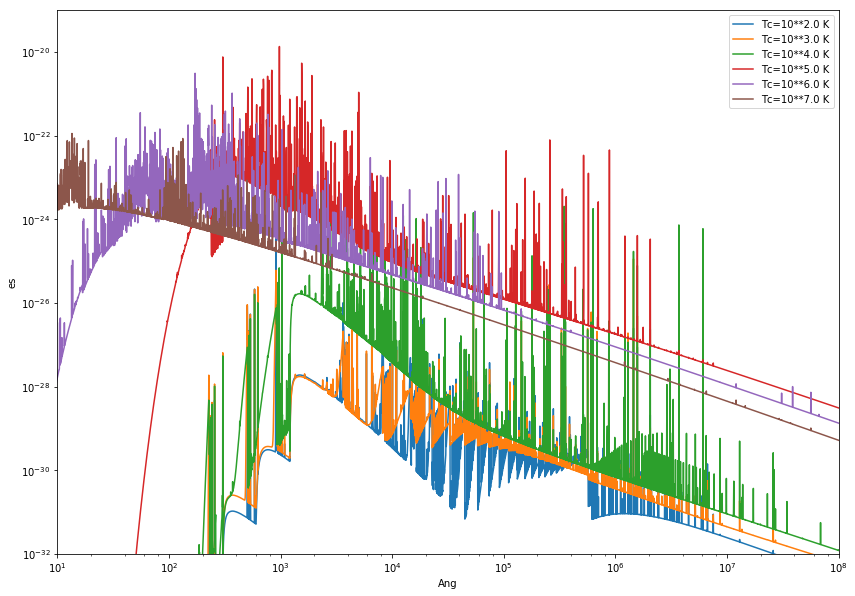

In [7]:
f, ax = plt.subplots(figsize=(14, 10))
for M in Ms:
    M.plot_spectrum(label='Tc=10**{} K'.format(M.model_name_s.split('_')[1]), ax=ax, xunit='Ang', )
ax.legend()
ax.set_xlim((10, 1e8))
ax.set_ylim((1e-32, 1e-19))

In [ ]:
# The following will run 61 models 8 at a time. Change this according to your computer...
for T in np.logspace(2, 7, 61):
    make_coronal(T)
pc.run_cloudy(dir_='../models', n_proc=8, use_make=True)

In [8]:
Ms = pc.load_models('../models/Coronal_', read_emis=False, read_heatcool=True)

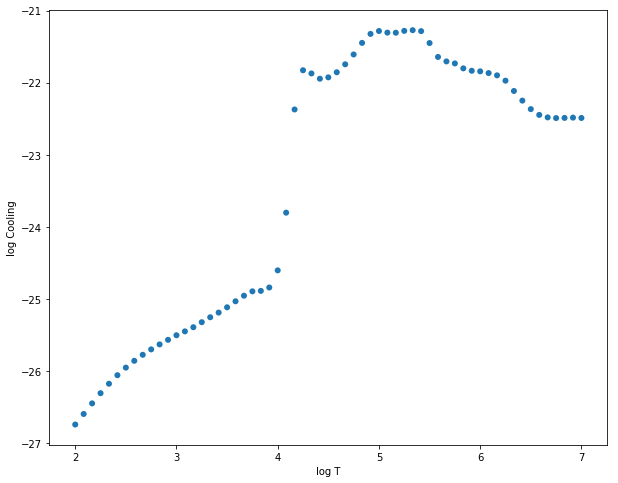

In [9]:
f, ax = plt.subplots(figsize=(10,8))
cool = [M.cool for M in Ms]
T0 = [M.T0 for M in Ms]
ax.scatter(np.log10(T0), np.log10(cool), edgecolor='None')
ax.set_xlabel('log T')
ax.set_ylabel('log Cooling')